<a href="https://colab.research.google.com/github/Thealansan/Evidencia3/blob/main/Consumer_Mit_Lab_Evidencia3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EVIDENCIA 3**

In [ ]:
#Instalamos libreria para analisis de variables categoricas
%pip install funpymodeling

In [ ]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from funpymodeling.exploratory import freq_tbl

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
#Carga desde un archivo .csv sin indice
df= pd.read_csv('Datos_limpios_Consumer_Mit_Lab_Evidencia.csv')

1.- Regresión logistica 


In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
#Carga desde un archivo .csv sin indice
df= pd.read_csv('Datos_limpios_Consumer_Mit_Lab_Evidencia.csv')
df.head(5)

In [ ]:
#Rellenamos nulos dentro del condigo 
df=df.fillna(method='ffill')

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión logística.
Vars_Indep= df[['238_frequency_buying_store', '81_number_online_purchases_month', '288_number_app_purchases_month']]
Var_Dep= df['308_topups_in_store']

In [ ]:
#Redefinimos las variables
X= Vars_Indep 
y= Var_Dep

In [ ]:
#Dividimos el conjunto de datos en la parte de entrenamiento y pruba:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)

In [ ]:
#Se escalan todos los datos 
escalar= StandardScaler()

In [ ]:
#Para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba 
X_train=escalar.fit_transform(X_train)
X_test= escalar.transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar 
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

In [ ]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no'], dtype=object)

In [ ]:
#Verifico matriz de confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión')
print(matriz)

Matriz de Confusión
[[65  8]
 [40  0]]


In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='binary', pos_label="yes")
print('Precision del modelo:')
print(precision)

Precision del modelo:
0.0


In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.5752212389380531


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.0


In [ ]:
freq_tbl(df)

In [ ]:
#Obtengo un análisis univariado de una variable categorica
table1= freq_tbl(df['282_payment_method_that_purchase'])
table1

In [ ]:
#Obtengo un filtro de los valores más reeñevantes de la variable
Filtro= table1[table1['frequency']>1]
Filtro

In [ ]:
#Ajusto el indice de mi DF
Filtro_index=Filtro.set_index('282_payment_method_that_purchase')
Filtro_index

Text(0, 0.5, 'Frecuencia')

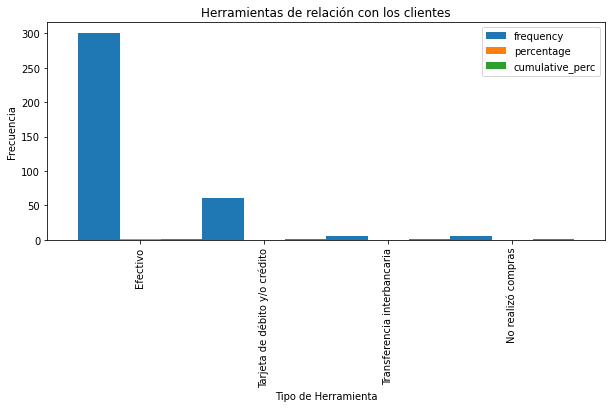

In [94]:
#Realizamos grafico de barras
Filtro_index.plot(kind = 'bar', width=1 , figsize=(10,4))
plt.title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

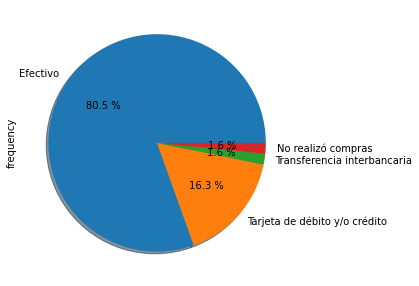

In [95]:
#Gráfico de pastel 
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

2.- Regresión logistica 


In [ ]:
#Declaramos las variables dependientes e independientes para la regresión logística.
Vars_Indep= df[['238_frequency_buying_store', '81_number_online_purchases_month', '288_number_app_purchases_month']]
Var_Dep= df['240_gender_interviewee']

In [ ]:
#Redefinimos las variables
X= Vars_Indep 
y= Var_Dep

In [ ]:
#Dividimos el conjunto de datos en la parte de entrenamiento y pruba:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)

In [ ]:
#Se escalan todos los datos 
escalar= StandardScaler()

In [ ]:
#Para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba 
X_train=escalar.fit_transform(X_train)
X_test= escalar.transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar 
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

In [ ]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

In [ ]:
#Verifico matriz de confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión')
print(matriz)

Matriz de Confusión
[[18 30]
 [27 38]]


In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='binary', pos_label="Female")
print('Precision del modelo:')
print(precision)

Precision del modelo:
0.4


In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.49557522123893805


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Female")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.375


3.- Regresión logistica 

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión logística.
Vars_Indep= df[['238_frequency_buying_store', '81_number_online_purchases_month', '288_number_app_purchases_month']]
Var_Dep= df['309_wiretransfers_in_store']

In [ ]:
#Redefinimos las variables
X= Vars_Indep 
y= Var_Dep

In [ ]:
#Dividimos el conjunto de datos en la parte de entrenamiento y pruba:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)

In [ ]:
#Se escalan todos los datos 
escalar= StandardScaler()

In [ ]:
#Para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba 
X_train=escalar.fit_transform(X_train)
X_test= escalar.transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar 
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

In [ ]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no'], dtype=object)

In [ ]:
#Verifico matriz de confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión')
print(matriz)

Matriz de Confusión
[[81  0]
 [32  0]]


In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='binary', pos_label="yes")
print('Precision del modelo:')
print(precision)

Precision del modelo:
0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.7168141592920354


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.0


4.- Regresión logistica 

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión logística.
Vars_Indep= df[['238_frequency_buying_store', '81_number_online_purchases_month', '288_number_app_purchases_month']]
Var_Dep= df['305_electricity_bill_store']

In [ ]:
#Redefinimos las variables
X= Vars_Indep 
y= Var_Dep

In [ ]:
#Dividimos el conjunto de datos en la parte de entrenamiento y pruba:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)

In [ ]:
#Se escalan todos los datos 
escalar= StandardScaler()

In [ ]:
#Para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba 
X_train=escalar.fit_transform(X_train)
X_test= escalar.transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar 
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

In [ ]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no'], dtype=object)

In [ ]:
#Verifico matriz de confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión')
print(matriz)

Matriz de Confusión
[[74  0]
 [37  2]]


In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='binary', pos_label="yes")
print('Precision del modelo:')
print(precision)

Precision del modelo:
1.0


In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.672566371681416


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.05128205128205128


5.- Regresion lineal 


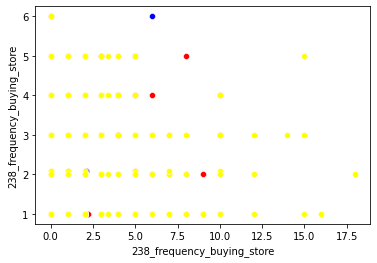

In [ ]:
#Se grafican mapas de dispersion de las 3 variables
from turtle import color

sns.scatterplot(x='238_frequency_buying_store', y='238_frequency_buying_store', color='blue', data=df)
sns.scatterplot(x='81_number_online_purchases_month', y='238_frequency_buying_store', color='red', data=df)
sns.scatterplot(x='288_number_app_purchases_month', y='238_frequency_buying_store', color='yellow', data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal.
Vars_Indep= df[['288_number_app_purchases_month', '81_number_online_purchases_month', '238_frequency_buying_store']]
Var_Dep= df['238_frequency_buying_store']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la funcion relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['288_number_app_purchases_month',
        '81_number_online_purchases_month', '238_frequency_buying_store'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 1.73107645e-17, -6.93889390e-18,  1.00000000e+00]),
 '_residues': 2.335506283888894e-28,
 'rank_': 3,
 'singular_': array([73.32159523, 33.38547158, 22.22690112]),
 'intercept_': -8.881784197001252e-16}

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R^2 Determinación
model.score(Vars_Indep,Var_Dep)

1.0

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous' 
y_pred= model.predict(X=df[['288_number_app_purchases_month', '81_number_online_purchases_month', '238_frequency_buying_store']])
y_pred

array([1. , 2. , 2. , 3. , 2. , 2. , 1. , 4. , 1. , 2. , 1. , 3. , 1. ,
       4. , 2. , 1. , 3. , 1. , 1. , 3. , 5. , 2. , 1. , 3. , 1. , 3. ,
       1. , 1. , 3. , 3. , 2. , 1. , 1. , 1. , 1. , 2. , 2. , 2. , 1. ,
       1. , 1. , 3. , 2.1, 1. , 1. , 2. , 1. , 1. , 1. , 4. , 5. , 3. ,
       2. , 2. , 2. , 2. , 1. , 1. , 1. , 3. , 2. , 1. , 2. , 2. , 3. ,
       3. , 2.1, 1. , 2. , 1. , 1. , 2.1, 1. , 1. , 1. , 2. , 1. , 2.1,
       1. , 2. , 1. , 2. , 1. , 3. , 1. , 4. , 1. , 1. , 2. , 2. , 1. ,
       1. , 5. , 1. , 4. , 1. , 1. , 2. , 1. , 1. , 2. , 2. , 1. , 4. ,
       1. , 1. , 5. , 2. , 1. , 1. , 2. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 2. , 3. , 2. , 1. , 2. , 1. , 1. , 1. , 3. , 1. , 4. ,
       2. , 2. , 1. , 2. , 2. , 2.1, 1. , 2. , 1. , 3. , 3. , 1. , 4. ,
       2. , 2. , 1. , 1. , 1. , 4. , 5. , 1. , 1. , 2. , 2. , 3. , 2. ,
       4. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 2. , 1. , 3. ,
       2. , 1. , 3. , 2. , 3. , 1. , 3. , 2. , 2. , 2. , 3. , 3.

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0, 'Predicciones', y_pred)
df

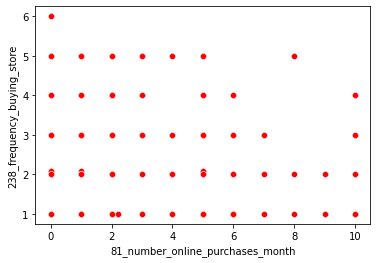

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x= '288_number_app_purchases_month', y= '238_frequency_buying_store', color= 'blue', data=df)
sns.scatterplot(x= '288_number_app_purchases_month', y= 'Predicciones', color= 'red', data=df)

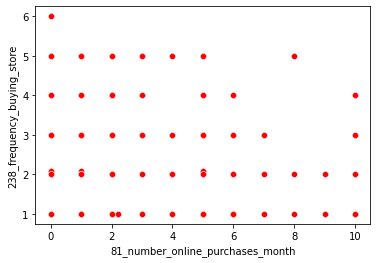

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x= '81_number_online_purchases_month', y= '238_frequency_buying_store', color= 'blue', data=df)
sns.scatterplot(x= '81_number_online_purchases_month', y= 'Predicciones', color= 'red', data=df)

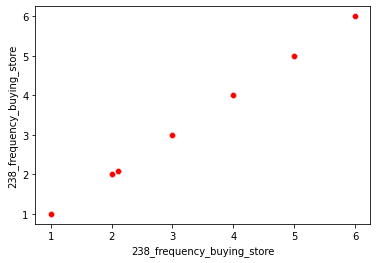

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x= '238_frequency_buying_store', y= '238_frequency_buying_store', color= 'blue', data=df)
sns.scatterplot(x= '238_frequency_buying_store', y= 'Predicciones', color= 'red', data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

1.0

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

1.0